In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf       
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Concatenate
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime


Downloading the datset for the first time

In [2]:

# # # key = 'GUL14652IV9ZYIPP'
# # # ts = TimeSeries(key,output_format='pandas')
# # # data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')

# # # # Replace 'YOUR_API_KEY' with your actual Polygon.io API key
# # # api_key = 'lxGU03xauqeabwyRjlkZZWpTLRtWDdr_'
# # # base_url = 'https://api.polygon.io/v2/aggs/ticker/'

# # # symbol = 'AAPL'  # Replace with the desired stock symbol
# # # interval = '1'  # 1 minute interval

# # # # Define the date range for the historical data
# # # start_date = '2015-01-01'
# # # end_date = '2023-01-31'

# # # # Set the limit for the number of data points
# # # limit = '50000'

# # # # Construct the API request URL with the 'limit' parameter
# # # url = f'{base_url}{symbol}/range/{interval}/minute/{start_date}/{end_date}?limit={limit}&apiKey={api_key}'

# # # # Send the API request and get the response
# # # response = requests.get(url)
# # # data = response.json()

# # # # Extract the historical data
# # # results = data['results']

# # # # Create a list of dictionaries for each data point
# # # data_list = []
# # # for item in results:
# # #     data_list.append({
# # #         'timestamp': pd.to_datetime(item['t'], unit='ms'),
# # #         'open': item['o'],
# # #         'high': item['h'],
# # #         'low': item['l'],
# # #         'close': item['c'],
# # #         'volume': item['v']
# # #     })

# # # # Create a DataFrame from the list of dictionaries
# # # df = pd.DataFrame(data_list)

# # # # Display the DataFrame
# # # print(df)

# # import requests
# # import pandas as pd
# # _______________________


# # # Replace 'YOUR_API_KEY' with your actual Polygon.io API key
# # api_key = 'lxGU03xauqeabwyRjlkZZWpTLRtWDdr_'
# # base_url = 'https://api.polygon.io/v2/aggs/ticker/'

# # symbol = 'AAPL'  # Replace with the desired stock symbol
# # interval = '1'  # 1 minute interval

# # # Define the date ranges for the historical data in YYYY-MM-DD format
# # start_date = '2021-08-16'
# # end_date = '2023-08-16'

# # # Initialize an empty list to store data points
# # data_list = []

# # # Define a time interval for each batch (e.g., 1 week)
# # time_interval = pd.DateOffset(weeks=4)

# # # Initialize the current date as the start date
# # current_date = pd.to_datetime(start_date)
# ______________________
# current_date_dateonly = current_date.date()
# current_date_dateonly

# # Loop to download data in batches based on date ranges
# while current_date <= pd.to_datetime(end_date):
#     # Calculate the end of the time interval
#     interval_end = current_date + time_interval

#     # Convert current_date to date only (YYYY-MM-DD format)
#     current_date_dateonly = current_date.date()
#     interval_end_dateonly = interval_end.date()

#     # Construct the API request URL with the current date range
#     url = f'{base_url}{symbol}/range/{interval}/minute/{current_date_dateonly}/{interval_end_dateonly}?limit=50000&apiKey={api_key}'

#     # Send the API request and get the response
#     response = requests.get(url)
#     data = response.json()
#     print(data)
#     # Extract the historical data from the batch
#     results = data['results']

#     # Append the data points to the list
#     data_list.extend(results)

#     # Move the current date to the next time interval
#     current_date = interval_end

# # Create a list of dictionaries for each data point
# formatted_data_list = []
# for item in data_list:
#     formatted_data_list.append({
#         'timestamp': pd.to_datetime(item['t'], unit='ms'),
#         'open': item['o'],
#         'high': item['h'],
#         'low': item['l'],
#         'close': item['c'],
#         'volume': item['v']
#     })

# # Create a Pandas DataFrame from the list of dictionaries
# df = pd.DataFrame(formatted_data_list)

# # Display the DataFrame
# print(df)


In [6]:
import pandas as pd
import requests
import time

# Replace 'YOUR_API_KEY' with your actual Polygon.io API key
api_key = 'lxGU03xauqeabwyRjlkZZWpTLRtWDdr_'
base_url = 'https://api.polygon.io/v2/aggs/ticker/'

symbol = 'AAPL'  # Replace with the desired stock symbol
interval = '1'  # 1 minute interval

# Define the date ranges for the historical data in YYYY-MM-DD format
start_date = '2021-11-1'
end_date = '2023-10-1'

# Initialize an empty list to store data points
data_list = []

# Define a time interval for each batch (e.g., 34 days)
time_interval = pd.DateOffset(days=34)

# Initialize the current date as the start date
current_date = pd.to_datetime(start_date)
i=0
# Loop to download data in batches based on date ranges
while current_date <= pd.to_datetime(end_date):
    # Calculate the end of the time interval
    interval_end = current_date + time_interval

    # Convert current_date to date only (YYYY-MM-DD format)
    current_date_dateonly = current_date.date()
    interval_end_dateonly = interval_end.date()

    # Construct the API request URL with the current date range
    url = f'{base_url}{symbol}/range/{interval}/minute/{current_date_dateonly}/{interval_end_dateonly}?limit=50000&apiKey={api_key}'

    # Send the API request and get the response
    response = requests.get(url)
    data = response.json()
    print(i,data['ticker'])
    # break
    # Extract the historical data from the batch
    results = data['results']

    # Append the data points to the list
    data_list.extend(results)
    i+=1
    # Wait for 1 + 10 seconds before making the next request
    if i%5==0:
        time.sleep(65)

    # Move the current date to the next time interval
    current_date = interval_end

# Create a list of dictionaries for each data point
formatted_data_list = []
for item in data_list:
    formatted_data_list.append({
        'timestamp': pd.to_datetime(item['t'], unit='ms'),
        'open': item['o'],
        'high': item['h'],
        'low': item['l'],
        'close': item['c'],
        'volume': item['v']
    })

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(formatted_data_list)

# Display the DataFrame
print(df)


0 AAPL
1 AAPL
2 AAPL
3 AAPL
4 AAPL
5 AAPL
6 AAPL
7 AAPL
8 AAPL
9 AAPL
10 AAPL
11 AAPL
12 AAPL
13 AAPL
14 AAPL
15 AAPL
16 AAPL
17 AAPL
18 AAPL
19 AAPL
20 AAPL
                 timestamp    open    high     low   close  volume
0      2021-11-01 08:00:00  149.95  150.15  149.95  150.15  2289.0
1      2021-11-01 08:01:00  150.00  150.00  150.00  150.00   747.0
2      2021-11-01 08:02:00  149.98  150.00  149.97  149.97   900.0
3      2021-11-01 08:03:00  150.00  150.03  150.00  150.00  2771.0
4      2021-11-01 08:04:00  150.00  150.00  149.95  149.95  1961.0
...                    ...     ...     ...     ...     ...     ...
400987 2023-10-13 23:53:00  178.50  178.50  178.50  178.50   603.0
400988 2023-10-13 23:55:00  178.45  178.45  178.45  178.45   197.0
400989 2023-10-13 23:57:00  178.41  178.41  178.41  178.41   154.0
400990 2023-10-13 23:58:00  178.41  178.41  178.40  178.41  1056.0
400991 2023-10-13 23:59:00  178.40  178.41  178.40  178.41  1327.0

[400992 rows x 6 columns]


In [20]:
response = requests.get(url)
# data = response.json()


In [24]:
dfpd.read_csv(url)

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
0,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,NaN,Active
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaN,Active
2,AAA,AXS First Priority CLO Bond ETF,NYSE ARCA,ETF,2020-09-09,NaN,Active
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaN,Active
4,AAC,Ares Acquisition Corporation - Class A,NYSE,Stock,2021-03-25,NaN,Active
...,...,...,...,...,...,...,...
11603,ZYNE,Zynerba Pharmaceuticals Inc,NASDAQ,Stock,2015-08-05,NaN,Active
11604,ZYRX,Global Earnings Capital Ltd,NASDAQ,Stock,2007-07-13,NaN,Active
11605,ZYXI,Zynex Inc,NASDAQ,Stock,2012-07-23,NaN,Active
11606,ZZK,NaN,NYSE ARCA,Stock,2020-07-22,NaN,Active


In [4]:
# csv_filename = 'stock_data.csv'
# df.to_csv(csv_filename, index=False)

# print(f"DataFrame saved to {csv_filename}")


In [7]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
devices = tf.config.list_physical_devices()
devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
tf.config.set_visible_devices(devices[0])


In [ ]:
addada

In [12]:
csv_filename = 'stock_data.csv'
df = pd.read_csv(csv_filename)


In [13]:
df.head()

,timestamp,open,high,low,close,volume
0,2021-08-16 08:00:00,148.99,148.99,148.87,148.87,891.0
1,2021-08-16 08:01:00,148.88,148.88,148.88,148.88,724.0
2,2021-08-16 08:02:00,148.94,148.94,148.94,148.94,700.0
3,2021-08-16 08:03:00,148.93,148.93,148.93,148.93,515.0
4,2021-08-16 08:06:00,148.76,148.76,148.72,148.72,860.0


In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [15]:
df.set_index('timestamp', inplace=True)


In [16]:
df.head()

,open,high,low,close,volume
timestamp,,,,,
2021-08-16 08:00:00,148.99,148.99,148.87,148.87,891.0
2021-08-16 08:01:00,148.88,148.88,148.88,148.88,724.0
2021-08-16 08:02:00,148.94,148.94,148.94,148.94,700.0
2021-08-16 08:03:00,148.93,148.93,148.93,148.93,515.0
2021-08-16 08:06:00,148.76,148.76,148.72,148.72,860.0


In [17]:
train_data = df[['open','high','low','close']][:int(0.8*len(df))]
test_data = df[['open','high','low','close']][int(0.8*len(df)):]

In [18]:
# Scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_train_data = scaler.fit_transform(train_data)
# scaled_test_data = scaler.transform(test_data)
scaled_test_dataX = np.array(test_data)
scaled_test_dataY = np.array(test_data)#[['open']])
scaled_train_dataX = np.array(train_data)
scaled_train_dataY = np.array(train_data)#[['open']])


def create_sequences(dataX,dataY, input_seq_length, seq_length):
    X = []
    y = []
    for i in range(len(dataX)-input_seq_length-seq_length):
        X.append(dataX[i:i+input_seq_length, :])
        y.append(dataY[i+input_seq_length:i+input_seq_length+seq_length, :])
    return np.array(X), np.array(y)


# Set input sequence length and prediction sequence length
input_seq_length = 10
seq_length = 5

# Create training sequences
X_train, y_train = create_sequences(
    scaled_train_dataX, scaled_train_dataY, input_seq_length, seq_length)

# Create testing sequences
X_test, y_test = create_sequences(
    scaled_test_dataX, scaled_test_dataY, input_seq_length, seq_length)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(
    X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(
    X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
y_train=y_train.reshape(-1,seq_length * 4)
y_test = y_test.reshape(-1,seq_length*4)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(
    X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(
    X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))

In [20]:
from tensorflow.keras import backend as K
def custom_loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))
    mae = K.mean(K.abs(y_true - y_pred))
    custom_loss = 0.7 * mse + 0.3 * mae
    return custom_loss


In [23]:
inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4)
output = lstm(inputs)
print(output.shape)

lstm = tf.keras.layers.LSTM(4, return_sequences=True)
out = lstm(inputs)
print(out.shape)
lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)
whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)
print(whole_seq_output.shape)

print(final_memory_state.shape)

print(final_carry_state.shape)


(32, 4)
(32, 10, 4)
(32, 10, 4)
(32, 4)
(32, 4)


In [ ]:
# Build the LSTM model using the functional API
inputs = Input(shape=(input_seq_length, 4))
lstm1 = LSTM(50,,return_sequences=True)(inputs)
# lstm2 = LSTM(50, return_sequences=False)(lstm1)
dense1 = Dense(25)(lstm1)
outputs = Dense(seq_length * 4)(dense1)
lstm_model = Model(inputs=inputs, outputs=outputs)


# Compile the LSTM model
lstm_model.compile(optimizer='adam',  loss=custom_loss)


In [ ]:
lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 4)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            11000     
                                                                 
 dense_2 (Dense)             (None, 10, 25)            1275      
                                                                 
 dense_3 (Dense)             (None, 10, 20)            520       
                                                                 
Total params: 12,795
Trainable params: 12,795
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred = lstm_model(X_train)

: 

: 

In [ ]:
history_lstm = lstm_model.fit(X_train, y_train, batch_size=64, epochs=2)

Epoch 1/2


: 

: 

In [ ]:
# Train the LSTM model

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)
history_lstm = lstm_model.fit(
    X_train, y_train, batch_size=128, epochs=2, callbacks=[tensorboard_callback])
# Retrieve the loss history from the history object
loss = history_lstm.history['loss']

# Retrieve the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the loss vs. epoch graph
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/2


: 

: 

In [ ]:
gpus

[]

Epoch 1/3
5144/5144 [==============================] - 63s 12ms/step - loss: 0.0011
Epoch 2/3
5144/5144 [==============================] - 63s 12ms/step - loss: 9.8535e-04
Epoch 3/3
5144/5144 [==============================] - 62s 12ms/step - loss: 8.5839e-04


In [ ]:
lstm_model.save('lstm_model_alpha_vantage.h5')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / (actual+1e-9))) * 100


def calculate_r_squared(actual, predicted):
    ss_residual = np.sum((actual - predicted) ** 2)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared
lstm_predictions = lstm_model.predict(X_test)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_mape = calculate_mape(y_test, lstm_predictions)
lstm_r_squared = calculate_r_squared(y_test, lstm_predictions)
# Print the evaluation metrics
print("LSTM:")
print("RMSE:", lstm_rmse)
print("MAE:", lstm_mae)
print("MAPE:", lstm_mape)
print("R-squared:", lstm_r_squared)


2572/2572 [==============================] - 15s 6ms/step
LSTM:
RMSE: 4.281185074058845
MAE: 2.6806414108656353
MAPE: 1.4223383111327323
R-squared: 0.8801190237506997


In [ ]:
lstm_predictions.reshape(-1,5,4).shape

(82292, 5, 4)

In [ ]:
lstm_predictions[0]


array([152.48611, 152.4808 , 152.35355, 152.42188, 152.3665 , 152.48729,
       152.33806, 152.39987, 152.41562, 152.49991, 152.34703, 152.41704,
       152.40347, 152.49559, 152.36559, 152.46242, 152.43239, 152.47215,
       152.41212, 152.37279], dtype=float32)

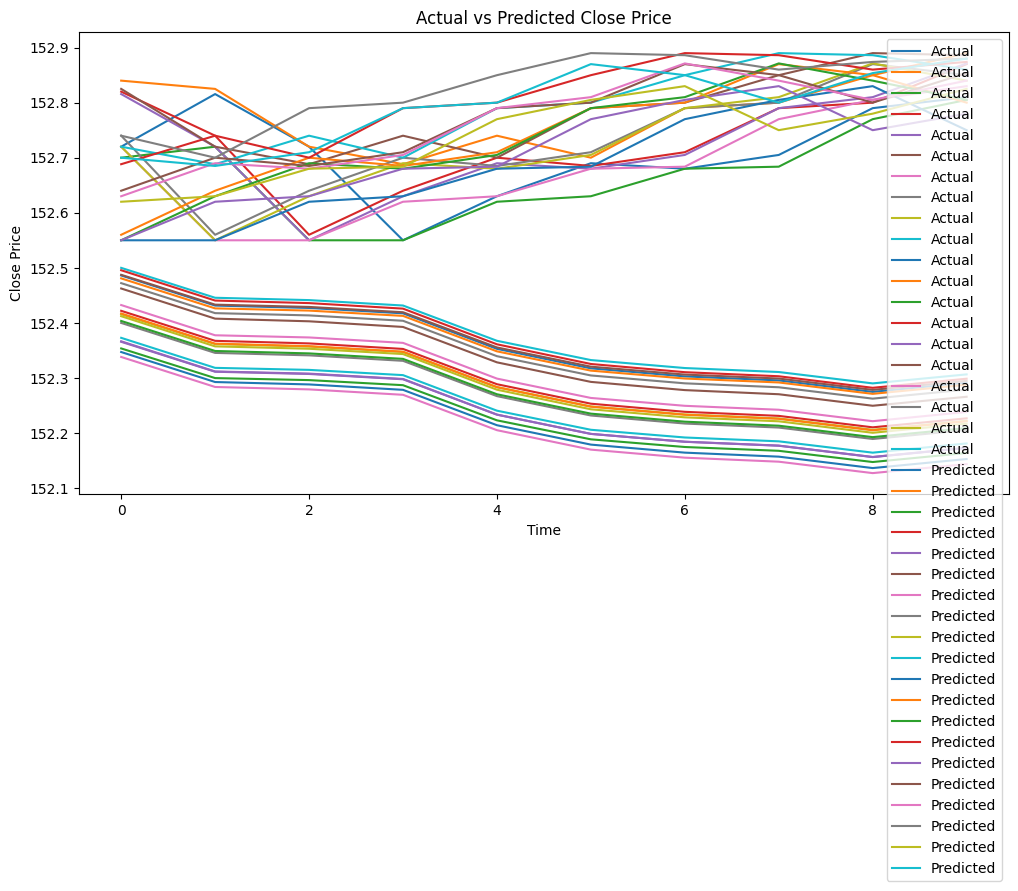

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:10], label='Actual')
plt.plot(lstm_predictions[:10], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


In [ ]:
test_data


,open,high,low,close
timestamp,,,,
2023-03-14 16:13:00,153.0100,153.0687,152.99,153.0056
2023-03-14 16:14:00,153.0000,153.0600,152.99,153.0100
2023-03-14 16:15:00,153.0000,153.0100,152.94,152.9600
2023-03-14 16:16:00,152.9599,152.9599,152.79,152.8800
2023-03-14 16:17:00,152.8900,152.9600,152.87,152.8812
...,...,...,...,...
2023-08-11 23:55:00,177.7000,177.7000,177.70,177.7000
2023-08-11 23:56:00,177.7000,177.7000,177.70,177.7000
2023-08-11 23:57:00,177.7000,177.7500,177.70,177.7500


In [ ]:
lstm_predictions[0].reshape(4,5)

array([[152.48611, 152.4808 , 152.35355, 152.42188, 152.3665 ],
       [152.48729, 152.33806, 152.39987, 152.41562, 152.49991],
       [152.34703, 152.41704, 152.40347, 152.49559, 152.36559],
       [152.46242, 152.43239, 152.47215, 152.41212, 152.37279]],
      dtype=float32)